In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np 


from kernels.squared_exponential import SquaredExponential

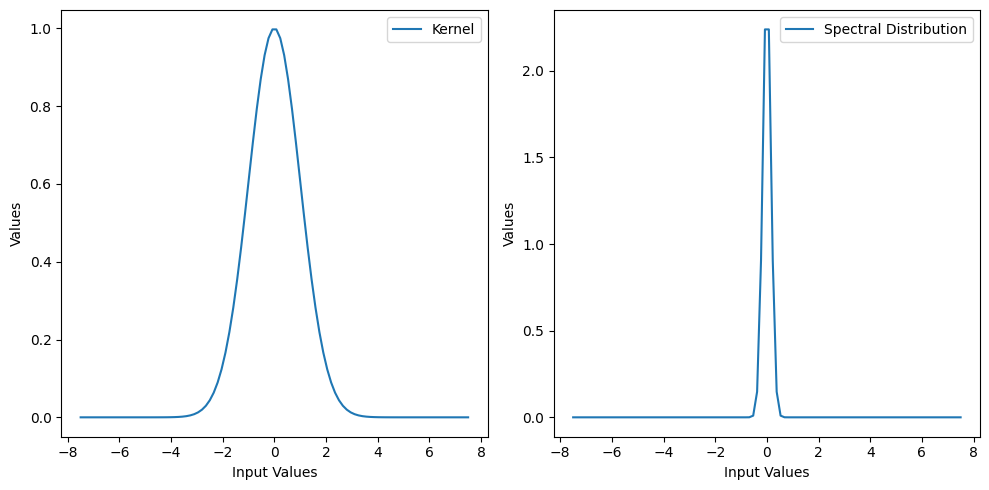

In [2]:

# Define the range of input values
x = torch.linspace(-7.5, 7.5, 100)

# Create an instance of the SquaredExponential kernel
kernel = SquaredExponential(dimension=1, lengthscale=1.0)

# Compute the kernel values for the range of input values
kernel_values = kernel.kernel(x)

# Compute the spectral distribution values for the range of input values
spectral_distribution_values = kernel.spectral_density(x)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the kernel values in the first subplot
axs[0].plot(x, kernel_values, label='Kernel')
axs[0].set_xlabel('Input Values')
axs[0].set_ylabel('Values')
axs[0].legend()

# Plot the spectral distribution values in the second subplot
axs[1].plot(x, spectral_distribution_values, label='Spectral Distribution')
axs[1].set_xlabel('Input Values')
axs[1].set_ylabel('Values')
axs[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [3]:
from utils.kernels import get_xis

In [4]:
outputs = get_xis(kernel_obj=kernel, eps=torch.tensor(1e-3), L=30, use_integral=True)

In [5]:
print("xis: ", outputs[0])
print("h_spacing: ", outputs[1])
print("mtot: ", outputs[2])

xis:  tensor([-0.5932, -0.5635, -0.5339, -0.5042, -0.4745, -0.4449, -0.4152, -0.3856,
        -0.3559, -0.3262, -0.2966, -0.2669, -0.2373, -0.2076, -0.1780, -0.1483,
        -0.1186, -0.0890, -0.0593, -0.0297,  0.0000,  0.0297,  0.0593,  0.0890,
         0.1186,  0.1483,  0.1780,  0.2076,  0.2373,  0.2669,  0.2966,  0.3262,
         0.3559,  0.3856,  0.4152,  0.4449,  0.4745,  0.5042,  0.5339,  0.5635,
         0.5932])
h_spacing:  0.029658697645563895
mtot:  41


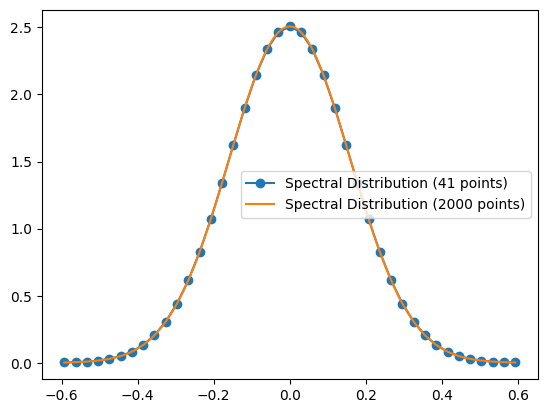

In [6]:
# Plot the spectral distribution values in the xis
plt.plot(outputs[0], kernel.spectral_density(outputs[0]), label=f'Spectral Distribution ({outputs[2]} points)', marker="o")
# Plot the spectral distribution values between the min and max xis, using 2000 points
x_points = torch.linspace(outputs[0].min(), outputs[0].max(), 2000)
plt.plot(x_points, kernel.spectral_density(x_points), label='Spectral Distribution (2000 points)')
plt.legend()


In [7]:
# not using the integral method, heuristic:
outputs = get_xis(kernel_obj=kernel, eps=torch.tensor(1e-3), L=30, use_integral=False)

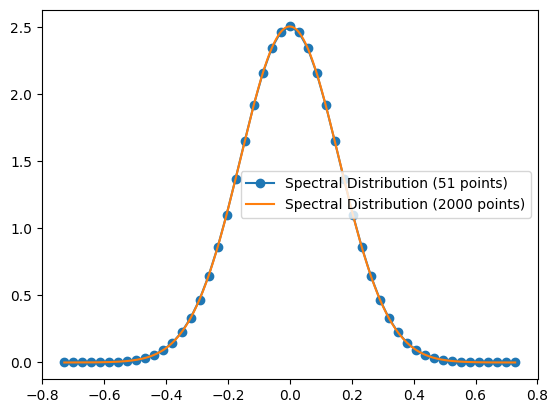

In [8]:
# Plot the spectral distribution values in the xis
plt.plot(outputs[0], kernel.spectral_density(outputs[0]), label=f'Spectral Distribution ({outputs[2]} points)', marker="o")
# Plot the spectral distribution values between the min and max xis, using 2000 points
x_points = torch.linspace(outputs[0].min(), outputs[0].max(), 2000)
plt.plot(x_points, kernel.spectral_density(x_points), label='Spectral Distribution (2000 points)')
plt.legend()

In [12]:
xis = outputs[0]
assert((xis[1:] - xis[:-1]).diff().abs() < 1e-7).all()

In [14]:
# do the same but for a matern kernel
from kernels.matern import Matern
kernel = Matern(dimension=1, lengthscale=1.0, name="matern32")


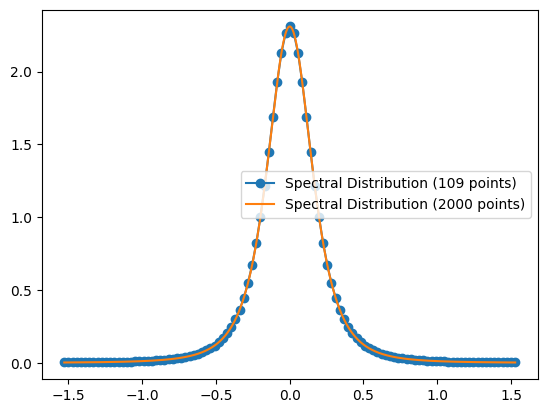

In [15]:
outputs = get_xis(kernel_obj=kernel, eps=torch.tensor(1e-3), L=30, use_integral=True)
# Plot the spectral distribution values in the xis
plt.plot(outputs[0], kernel.spectral_density(outputs[0]), label=f'Spectral Distribution ({outputs[2]} points)', marker="o")
# Plot the spectral distribution values between the min and max xis, using 2000 points
x_points = torch.linspace(outputs[0].min(), outputs[0].max(), 2000)
plt.plot(x_points, kernel.spectral_density(x_points), label='Spectral Distribution (2000 points)')
plt.legend()

In [17]:
outputs[0].diff()

tensor([0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287, 0.0287,
        0.0287, 0.0287, 0.0287, 0.0287, 

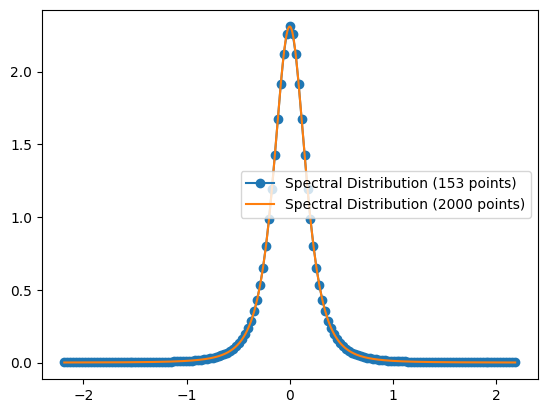

In [16]:
outputs = get_xis(kernel_obj=kernel, eps=torch.tensor(1e-3), L=30, use_integral=False)
# Plot the spectral distribution values in the xis
plt.plot(outputs[0], kernel.spectral_density(outputs[0]), label=f'Spectral Distribution ({outputs[2]} points)', marker="o")
# Plot the spectral distribution values between the min and max xis, using 2000 points
x_points = torch.linspace(outputs[0].min(), outputs[0].max(), 2000)
plt.plot(x_points, kernel.spectral_density(x_points), label='Spectral Distribution (2000 points)')
plt.legend()